In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


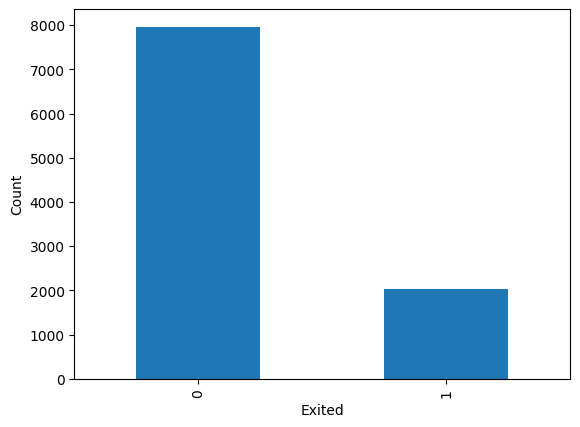

In [8]:
plt.xlabel('Exited')
plt.ylabel('Count')
df['Exited'].value_counts().plot.bar()
plt.show()

In [9]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [10]:
df = pd.concat([df,pd.get_dummies(df['Geography'],prefix='Geo')],axis=1)

In [11]:
df = pd.concat([df,pd.get_dummies(df['Gender'])],axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Geo_France       10000 non-null  bool   
 15  Geo_Germany      10000 non-null  bool   
 16  Geo_Spain        10000 non-null  bool   
 17  Female       

In [13]:
df.drop(columns=['RowNumber','CustomerId','Surname','Geography','Gender'],inplace=True)

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


### Splitting Data

In [15]:
y = df['Exited'].values
x = df.loc[:,df.columns != 'Exited'].values

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=20,test_size=0.25)

### Scaling Data

In [17]:
from sklearn.preprocessing import StandardScaler
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

In [18]:
x_train.shape

(7500, 13)

### Tensorflow Model - Neural Network Classifier

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv1D,Flatten
from tensorflow.keras.models import Sequential, Model

In [20]:
model=Sequential()
model.add(Flatten(input_shape=(13,)))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='BinaryCrossentropy')

In [22]:
model.fit(x_train,y_train,batch_size=64,validation_split=0.1,epochs=100)

Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7582 - loss: 0.5484 - val_accuracy: 0.8267 - val_loss: 0.4233
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8072 - loss: 0.4328 - val_accuracy: 0.8373 - val_loss: 0.4020
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8225 - loss: 0.4128 - val_accuracy: 0.8400 - val_loss: 0.3835
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8396 - loss: 0.3929 - val_accuracy: 0.8547 - val_loss: 0.3623
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8399 - loss: 0.3817 - val_accuracy: 0.8627 - val_loss: 0.3488
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8433 - loss: 0.3729 - val_accuracy: 0.8693 - val_loss: 0.3361
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8519 - loss: 0.3527 - val_accuracy: 0.8653 - val_loss: 0.3329
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8525 - loss: 0.3524 - val_accu

In [23]:
pred = model.predict(x_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [24]:
y_pred = []
for val in pred:
    if val > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [26]:
accuracy_score(y_test,y_pred)

0.8604

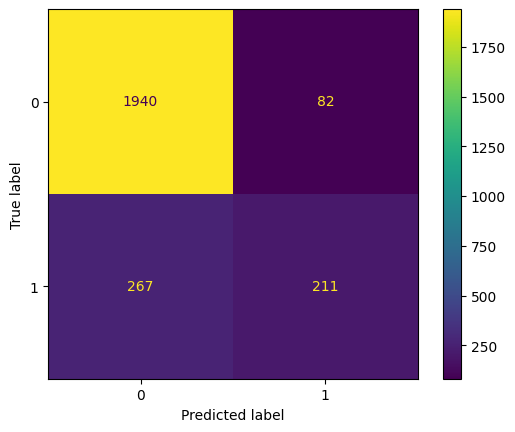

In [28]:
cm = confusion_matrix(y_test,y_pred)
display = ConfusionMatrixDisplay(cm)
display.plot()